# Aula 1

## Carregando os dados

In [1]:
import pandas as pd

In [2]:
path = 'https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv'
passageiros = pd.read_csv(path, encoding='utf8')
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [3]:
import seaborn as sns

In [4]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = 22

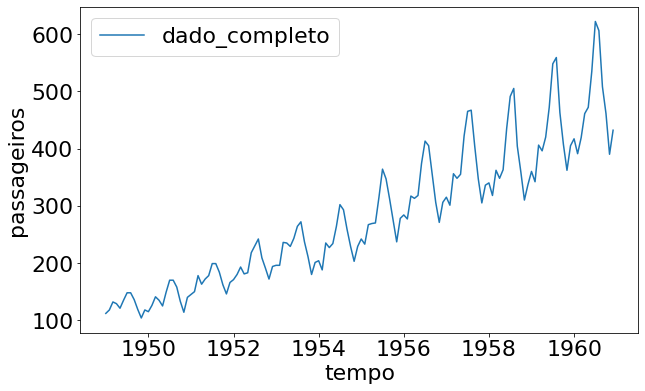

In [5]:
sns.lineplot(x='tempo',y='passageiros', data=passageiros,label='dado_completo') 

## Escalando os dados

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()

In [8]:
sc.fit(passageiros)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
dado_escalado = sc.transform(passageiros)

In [10]:
x=dado_escalado[:,0] #Features - Características - Tempo
y=dado_escalado[:,1] #Alvo - Número de passageiros

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Data')

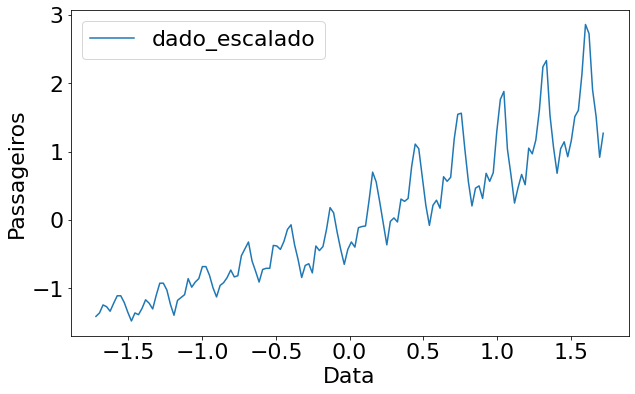

In [12]:
sns.lineplot(x=x,y=y,label='dado_escalado') 
plt.ylabel('Passageiros')
plt.xlabel('Data')

## Dividindo em treino e teste

In [13]:
tamanho_treino = int(len(passageiros)*0.9) #Pegando 90% dos dados para treino
tamanho_teste = len(passageiros)-tamanho_treino #O resto vamos reservar para teste

In [14]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [15]:
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

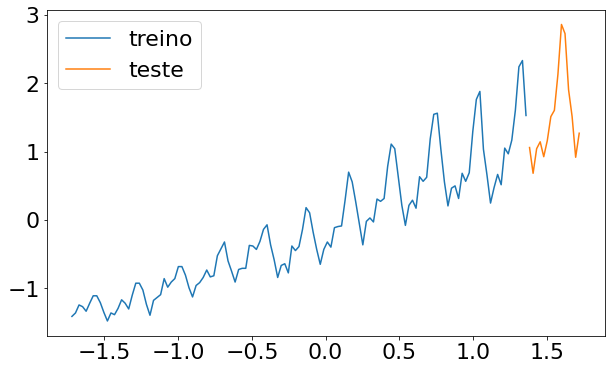

In [16]:
sns.lineplot(x=xtreino,y=ytreino,label='treino') 
sns.lineplot(x=xteste,y=yteste,label='teste') 

# Aula 2

## Regressão Linear

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
regressor = Sequential()

In [19]:
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', 
                    activation='linear',use_bias=False))

In [20]:
regressor.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [22]:
regressor.fit(xtreino,ytreino)

5/5 [==============================] - 3s 3ms/step - loss: 0.1285


In [23]:
y_predict= regressor.predict(xtreino) #Prevendo os dados de treino (o ajuste)

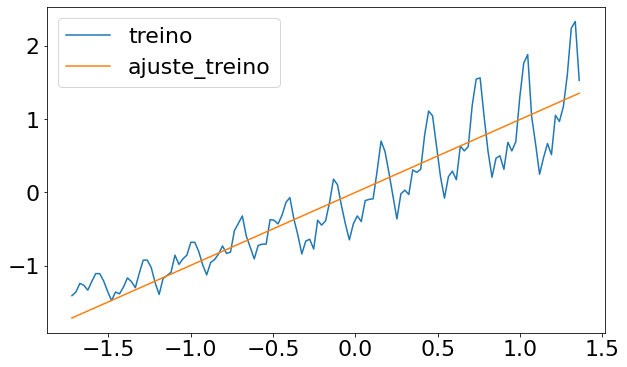

In [24]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')

In [25]:
d = {'tempo': xtreino, 'passageiros': y_predict[:,0]}
resultados = pd.DataFrame(data=d)

In [26]:
resultados

,tempo,passageiros
0,-1.720064,-1.711679
1,-1.696007,-1.687739
2,-1.671950,-1.663800
3,-1.647894,-1.639860
4,-1.623837,-1.615920
...,...,...
124,1.262984,1.256827
125,1.287041,1.280767
126,1.311098,1.304706
127,1.335155,1.328646


In [27]:
resultado_transf = sc.inverse_transform(resultados)

In [28]:
resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['tempo','passageiros']

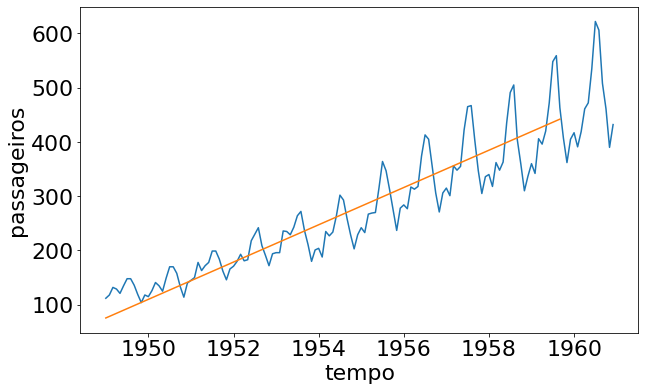

In [29]:
sns.lineplot(x="tempo",y="passageiros",data=passageiros)
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf)

In [30]:
y_predict_teste= regressor.predict(xteste) #Prevendo os dados de teste(o futuro)

In [31]:
d = {'tempo': xteste, 'passageiros': y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)

In [32]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)

In [33]:
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns = ['tempo','passageiros']

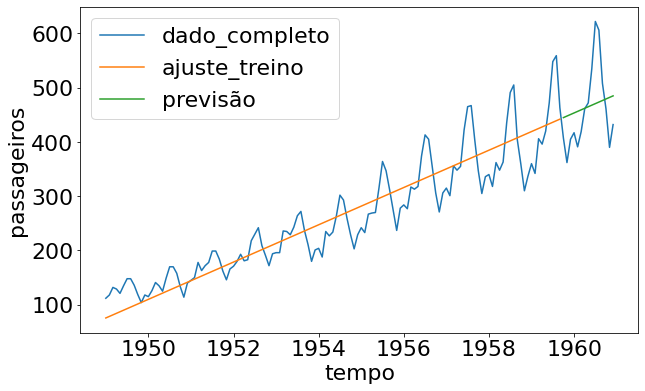

In [34]:
sns.lineplot(x="tempo",y="passageiros",data=passageiros,label='dado_completo')
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf,label='ajuste_treino')
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf_teste,label='previsão')

## Regressão não-linear

In [35]:
regressor2 = Sequential()

In [36]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', 
                     activation='sigmoid',use_bias=False)) 
regressor2.add(Dense(8, kernel_initializer='random_uniform', 
                     activation='sigmoid',use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', 
                     activation='linear',use_bias=False))

In [37]:
regressor2.compile(loss='mean_squared_error',optimizer='adam')
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [38]:
regressor2.fit(xtreino,ytreino,epochs =500)

Epoch 1/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8187
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8116
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8081
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8078
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8074
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8067
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8064
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8056
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8041
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7993
Epoch 11/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7972
Epoch 12/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7963
Epoch 13/500
5/5 [==============================] - 0s 2ms/st

In [39]:
y_predict= regressor2.predict(xtreino) #Prevendo os dados de treino (o ajuste)

In [40]:
y_predict_teste= regressor2.predict(xteste) #Prevendo os dados de teste(o futuro)

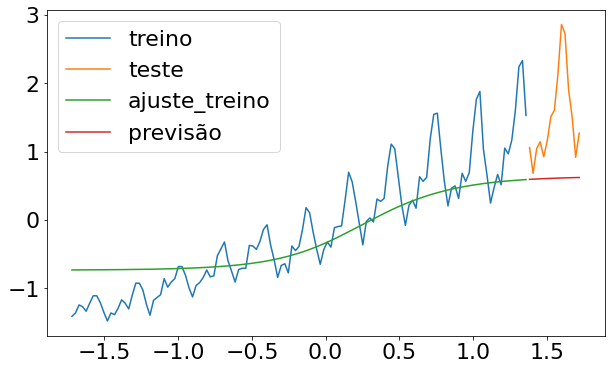

In [41]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')
sns.lineplot(x=xteste,y=y_predict_teste[:,0],label='previsão')

# Aula 3

## Alterando a forma como passamos os dados

Agora x e y vão valores diferentes. X vai conter o número de passageiros em um tempo anterior e y vai conter o número de passageiros em t+1, por exemplo. 

In [42]:
vetor = pd.DataFrame(ytreino)[0]

In [43]:
import numpy as np

In [44]:
def separa_dados(vetor,n_passos):
  """Entrada: vetor: número de passageiros
               n_passos: número de passos no regressor
     Saída:
              X_novo: Array 2D 
              y_novo: Array 1D - Nosso alvo
  """
  X_novo, y_novo = [], []
  for i in range(n_passos,vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo) 
  return X_novo, y_novo

In [45]:
xtreino_novo, ytreino_novo = separa_dados(vetor,1)

In [46]:
xtreino_novo[0:5] #X

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [47]:
ytreino_novo[0:5] #y

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

## Agora vamos separar o teste

In [48]:
vetor2 = pd.DataFrame(yteste)[0]

In [49]:
xteste_novo, yteste_novo = separa_dados(vetor2,1)

## Voltando para as redes neurais

In [50]:
regressor3 = Sequential()

In [51]:
regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear',use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor3.compile(loss='mean_squared_error',optimizer='adam')
regressor3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 64        
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________


In [52]:
regressor3.fit(xtreino_novo,ytreino_novo,epochs =100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7637
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7388
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7190
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6978
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6723
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6463
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6178
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5879
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5532
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5151
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4792
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4377
Epoch 13/100
4/4 [==============================] - 0s 2ms/st

In [53]:
y_predict_novo = regressor3.predict(xtreino_novo)

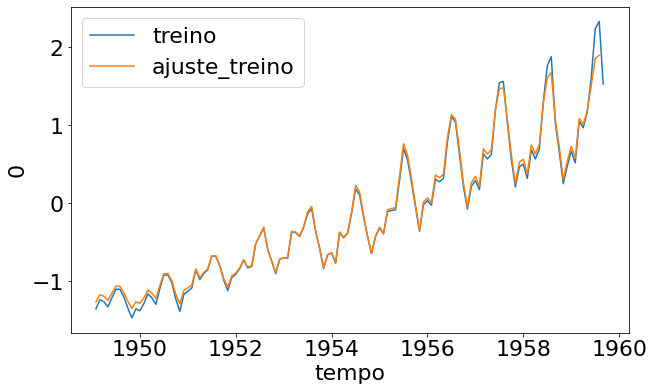

In [54]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

In [55]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

In [56]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

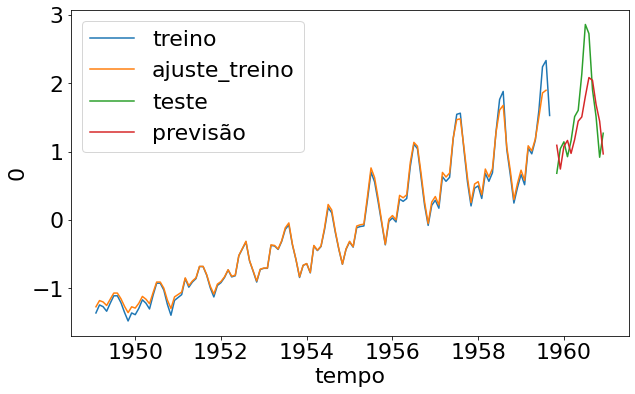

In [57]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[130:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[130:144],label='previsão')

## Janelas

In [58]:
xtreino_novo, ytreino_novo = separa_dados(vetor,4)

In [59]:
xtreino_novo[0:5] #X

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [60]:
ytreino_novo[0:5] #y

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [61]:
xteste_novo, yteste_novo = separa_dados(vetor2,4)

In [62]:
regressor4 = Sequential()

In [63]:
regressor4.add(Dense(8, input_dim=4, kernel_initializer='random_uniform', activation='linear',use_bias=False)) #relu
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False)) #relu
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor4.compile(loss='mean_squared_error',optimizer='adam')
regressor4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_8 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 64        
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________


In [64]:
regressor4.fit(xtreino_novo,ytreino_novo,epochs =300)

Epoch 1/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7825
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7658
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7547
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7563
Epoch 5/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7544
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7498
Epoch 7/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7437
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7369
Epoch 9/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7307
Epoch 10/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7230
Epoch 11/300
4/4 [==============================] - 0s 4ms/step - loss: 0.7141
Epoch 12/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7055
Epoch 13/300
4/4 [==============================] - 0s 3ms/st

In [65]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

In [66]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

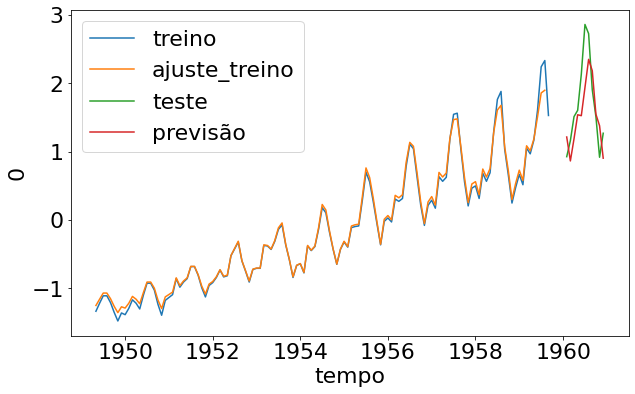

In [67]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[4:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[4:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[133:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[133:144],label='previsão')

# Aula 04

In [68]:
bike = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv', encoding='utf8')
bike

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [69]:
bike['datas'] = pd.to_datetime(bike['datas'])

In [70]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

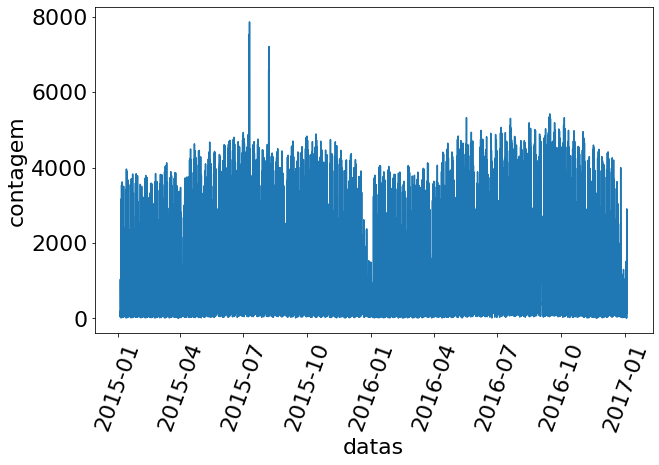

In [71]:
sns.lineplot(x='datas', y='contagem', data=bike)
plt.xticks(rotation=70)

In [72]:
sc2 = StandardScaler()

In [73]:
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [74]:
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

In [75]:
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike) - tamanho_treino

In [76]:
ytreino = y[0:tamanho_treino]

In [77]:
yteste = y[tamanho_treino:len(bike)]

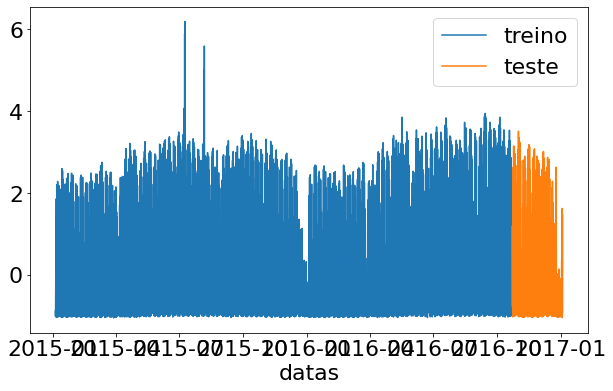

In [78]:
sns.lineplot(x='datas', y=ytreino[:,0], data = bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')

In [79]:
vetor = pd.DataFrame(ytreino)[0]

In [80]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 10)

In [81]:
xtreino_novo

array([[-0.88574518, -0.9262953 , -0.92998167, ..., -0.9843557 ,
        -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, ..., -0.93274645,
        -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, ..., -0.77607553,
        -0.56687377, -0.38347663],
       ...,
       [-0.02774148, -0.29131727, -0.4323211 , ..., -0.72630948,
        -0.8534894 , -0.91523618],
       [-0.29131727, -0.4323211 , -0.51065656, ..., -0.8534894 ,
        -0.91523618, -0.9548647 ],
       [-0.4323211 , -0.51065656, -0.55212827, ..., -0.91523618,
        -0.9548647 , -0.9548647 ]])

In [82]:
vetor2 = pd.DataFrame(yteste)[0]

In [83]:
xteste_novo, yteste_novo = separa_dados(vetor2, 10)

In [84]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0], xtreino_novo.shape[1],1))

In [85]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0], xteste_novo.shape[1],1))

In [86]:
recorrente = Sequential()

# Aula 05

In [87]:
from tensorflow.keras.layers import LSTM, Dense

In [88]:
recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente.add(Dense(units=1))

In [89]:
recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')

In [90]:
recorrente.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [91]:
recorrente.fit(xtreino_novo, ytreino_novo, validation_data=(xteste_novo, yteste_novo),
               epochs=100)

Epoch 1/100
490/490 [==============================] - 7s 5ms/step - loss: 0.2539 - val_loss: 0.0675
Epoch 2/100
490/490 [==============================] - 2s 4ms/step - loss: 0.0753 - val_loss: 0.0453
Epoch 3/100
490/490 [==============================] - 2s 4ms/step - loss: 0.0562 - val_loss: 0.0395
Epoch 4/100
490/490 [==============================] - 2s 4ms/step - loss: 0.0466 - val_loss: 0.0304
Epoch 5/100
490/490 [==============================] - 2s 4ms/step - loss: 0.0428 - val_loss: 0.0333
Epoch 6/100
490/490 [==============================] - 2s 4ms/step - loss: 0.0397 - val_loss: 0.0239
Epoch 7/100
490/490 [==============================] - 2s 4ms/step - loss: 0.0378 - val_loss: 0.0226
Epoch 8/100
490/490 [==============================] - 2s 4ms/step - loss: 0.0359 - val_loss: 0.0238
Epoch 9/100
490/490 [==============================] - 2s 4ms/step - loss: 0.0342 - val_loss: 0.0238
Epoch 10/100
490/490 [==============================] - 2s 4ms/step - loss: 0.0329 - val_lo

In [92]:
y_ajustado = recorrente.predict(xtreino_novo)

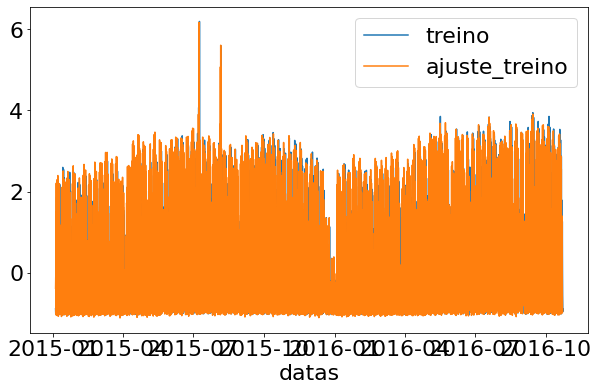

In [93]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas', y=y_ajustado[:,0], data=bike[0:15662], label='ajuste_treino')

In [94]:
y_predito = recorrente.predict(xteste_novo)

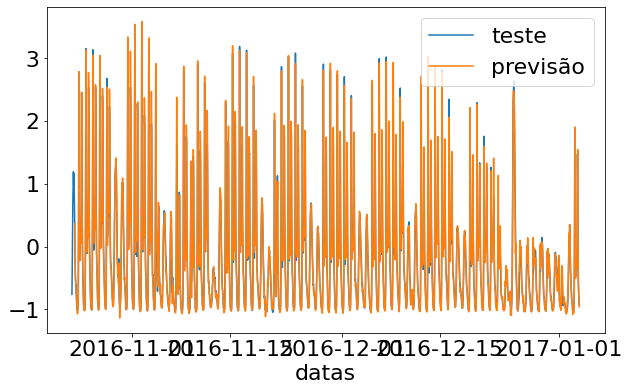

In [95]:
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')
sns.lineplot(x='datas', y=y_predito[:,0], data=bike[tamanho_treino+10:len(bike)], label='previsão')

In [96]:
from tensorflow.keras.layers import GRU

In [97]:
recorrente_g = Sequential()

In [98]:
recorrente_g.add(GRU(128, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente_g.add(Dense(units=1))

In [99]:
recorrente_g.compile(loss='mean_squared_error', optimizer='RMSProp')

In [100]:
recorrente_g.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 128)               50304     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [101]:
recorrente.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [102]:
resultado2 = recorrente_g.fit(xtreino_novo, ytreino_novo,
                              validation_data=(xteste_novo, yteste_novo), epochs=100)

Epoch 1/100
490/490 [==============================] - 4s 4ms/step - loss: 0.2007 - val_loss: 0.0640
Epoch 2/100
490/490 [==============================] - 2s 3ms/step - loss: 0.0633 - val_loss: 0.0476
Epoch 3/100
490/490 [==============================] - 2s 3ms/step - loss: 0.0489 - val_loss: 0.0462
Epoch 4/100
490/490 [==============================] - 2s 3ms/step - loss: 0.0419 - val_loss: 0.0238
Epoch 5/100
490/490 [==============================] - 2s 3ms/step - loss: 0.0385 - val_loss: 0.0239
Epoch 6/100
490/490 [==============================] - 2s 3ms/step - loss: 0.0359 - val_loss: 0.0220
Epoch 7/100
490/490 [==============================] - 2s 3ms/step - loss: 0.0346 - val_loss: 0.0222
Epoch 8/100
490/490 [==============================] - 2s 3ms/step - loss: 0.0325 - val_loss: 0.0225
Epoch 9/100
490/490 [==============================] - 2s 3ms/step - loss: 0.0316 - val_loss: 0.0221
Epoch 10/100
490/490 [==============================] - 2s 3ms/step - loss: 0.0308 - val_lo

In [105]:
y_predito2 = recorrente_g.predict(xteste_novo)

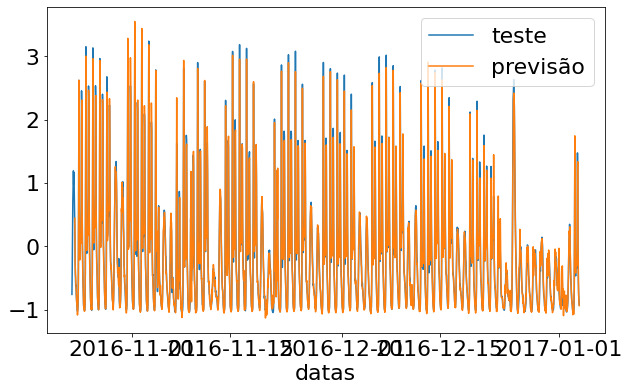

In [106]:
sns.lineplot(x='datas', y=yteste[:,0],data=bike[tamanho_treino:len(bike)],label='teste')
sns.lineplot(x='datas',y=y_predito2[:,0],data=bike[tamanho_treino+10:len(bike)],label='previsão')

In [107]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


Text(0, 0.5, 'Custo')

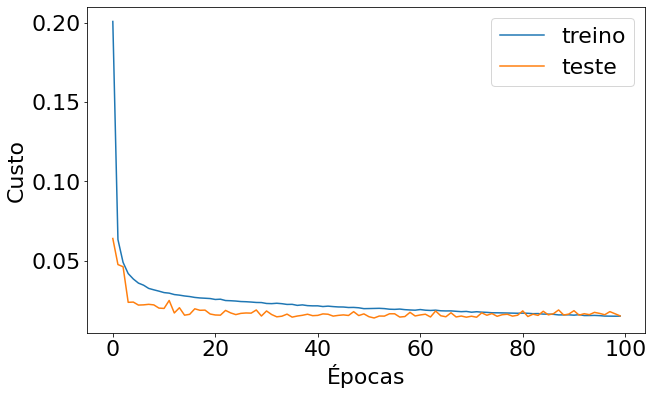

In [111]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino','teste'])
plt.xlabel('Épocas')
plt.ylabel('Custo')